In [ ]:
# Step 1: Load the iris dataset from iris.csv
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the Iris dataset from iris.csv
iris_df = pd.read_csv('/content/Iris.csv')
X = iris_df.iloc[:, :-1].values  # Features
y = iris_df.iloc[:, -1].values   # Target

mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['species'] = iris_df['species'].map(mapping)
# Display the first few rows of the dataset
iris_df.head(8)


,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0


# New Section

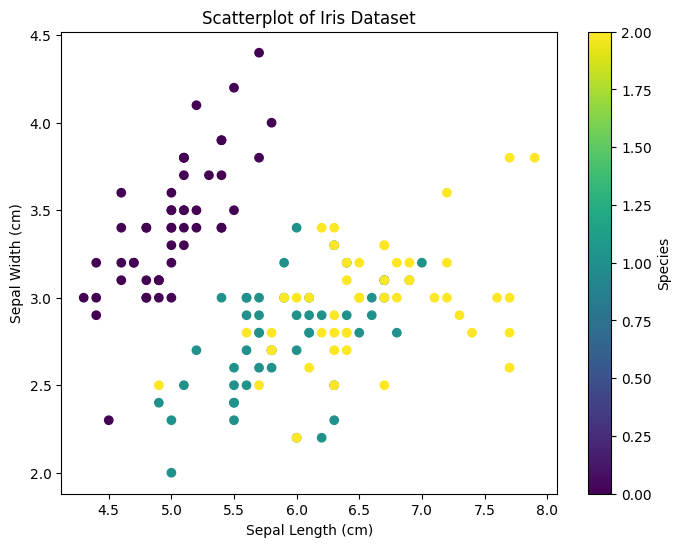

In [ ]:
# Step 2: Display a scatterplot of the dataset
import matplotlib.pyplot as plt

# Scatterplot of the dataset colored by species
plt.figure(figsize=(8, 6))
scatter = plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c=pd.factorize(iris_df['species'])[0], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatterplot of Iris Dataset')

# Add a colorbar
plt.colorbar(scatter, label='Species')
plt.show()



In [ ]:
# Cell 4: Implement KMeans clustering from scratch
class KMeans:
    def __init__(self, n_clusters=3, max_iters=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.history = []

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)

            # Compute new centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check convergence
            if np.allclose(self.centroids, new_centroids, atol=self.tol):
                break

            self.centroids = new_centroids
            self.history.append(self.centroids)

        self.labels = labels
        return self


In [ ]:
# Apply k means clustering on the iris dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Extract features
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get cluster assignments
labels = kmeans.labels
centroids = kmeans.centroids



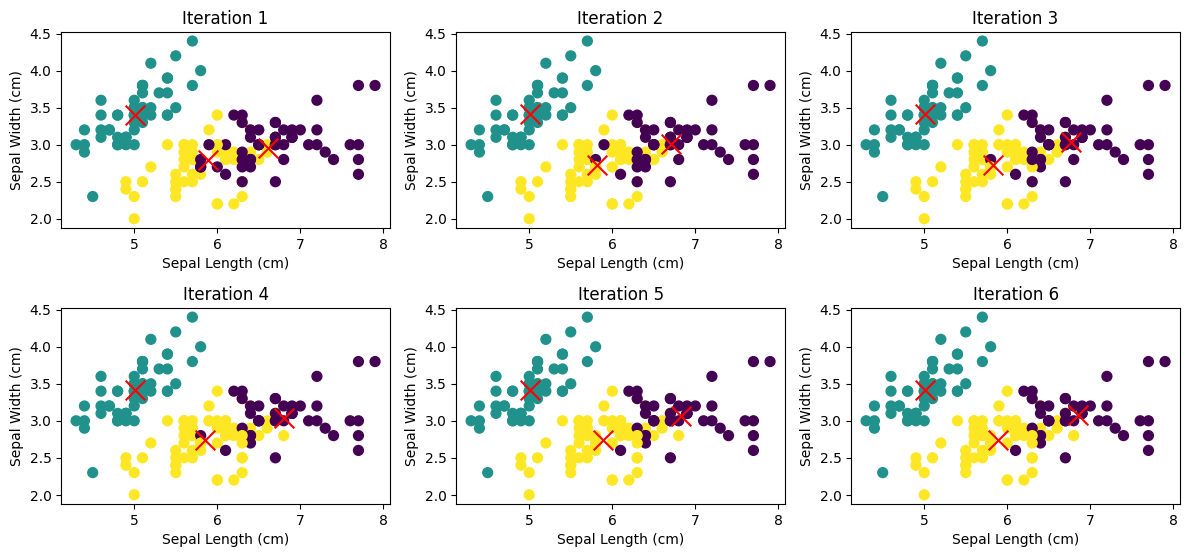

In [ ]:
# Store centroids and labels for each iteration
centroids_history = [kmeans.centroids.copy()]
labels_history = [kmeans.labels.copy()]  # Directly store cluster assignments

# Display plots to show the iteration history of the implemented algorithm

if kmeans.history:
    plt.figure(figsize=(12, 8))
    for i, centroids in enumerate(kmeans.history):
        plt.subplot(3, 3, i+1)  # Adjusted here
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)  # Updated here
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
        plt.xlabel('Sepal Length (cm)')
        plt.ylabel('Sepal Width (cm)')
        plt.title(f'Iteration {i+1}')
    plt.tight_layout()
    plt.show()
else:
    print("No iteration history to display.")



In [ ]:
# Assign cluster labels to testing data based on nearest centroids
distances = np.sqrt(((X_test[:, np.newaxis] - kmeans.centroids)**2).sum(axis=2))
y_pred = np.argmin(distances, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Clustering Accuracy:", accuracy)


Clustering Accuracy: 0.03333333333333333
